In [51]:
import numpy as np
import matplotlib.pyplot as plt
from myPDS import compute_and_plot_fft, LowPassFIR


In [64]:
sig_raw = np.loadtxt("raw_data.txt")

N = sig_raw.size
Fs = (N-1)/3.0


100.0

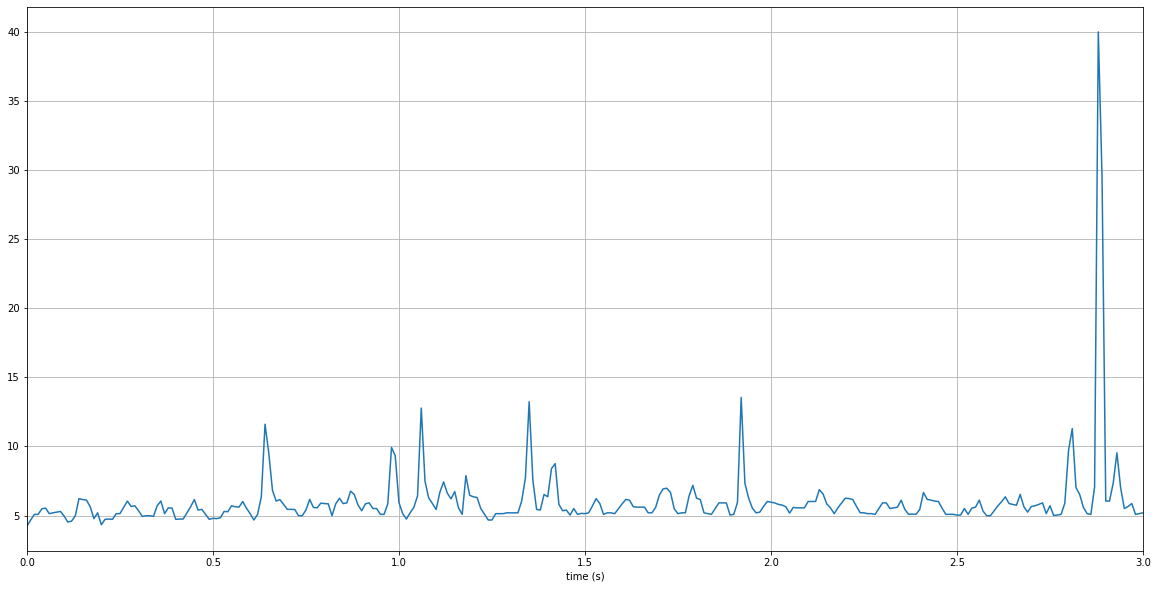

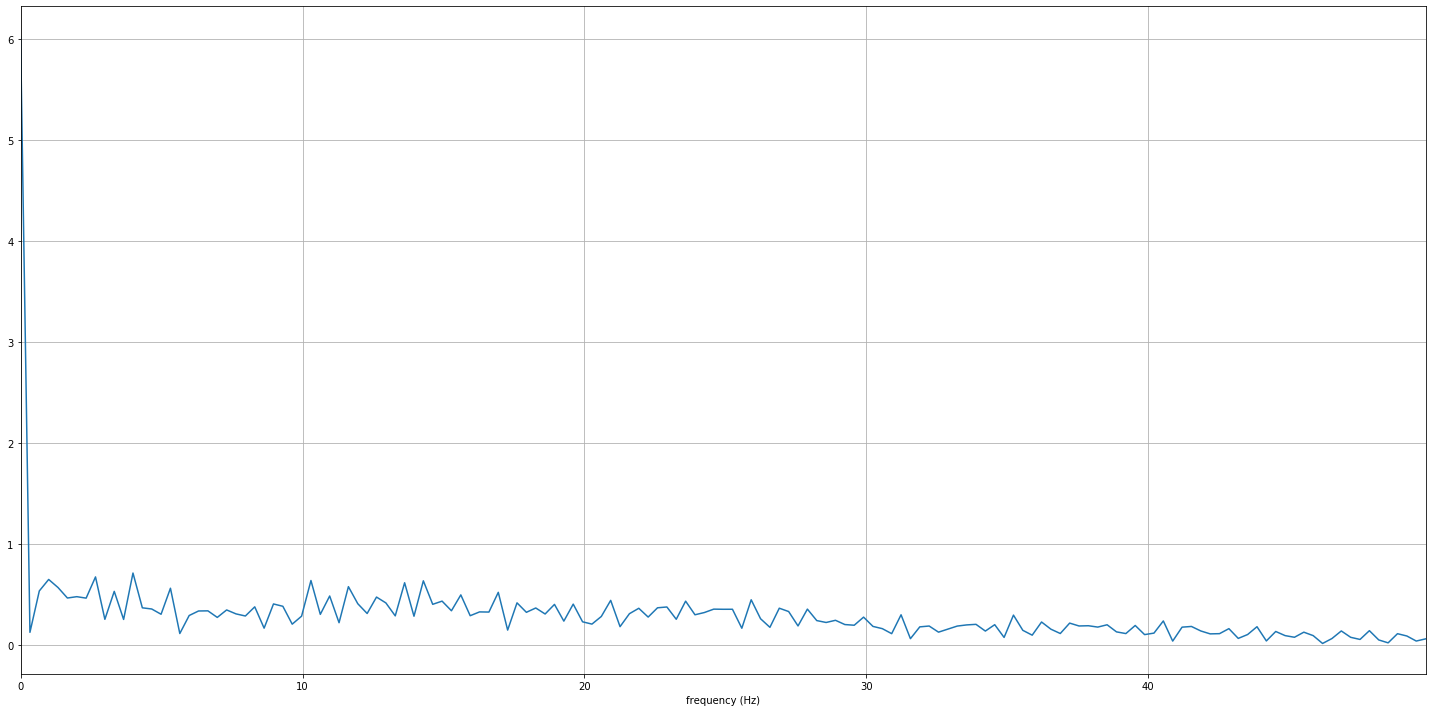

array([ 1.81220000e+03 +0.j        ,  1.74387075e+01 +7.98050502j,
        4.84014263e+01+64.72926767j,  7.08181059e+01+67.60794524j,
        2.18867281e+01+83.02292253j,  1.96080734e+01+67.48534038j,
       -3.30861978e+00+72.19579886j, -4.90922867e+01+50.04945845j,
       -4.34957628e+01+91.92358j   , -2.30634341e+01+30.87456765j,
       -7.46417030e+01+29.29181849j, -3.83533018e+01 +1.47691212j,
       -1.07170719e+02 +7.87560333j, -5.49490873e+01 -9.03064388j,
       -3.40768492e+01-41.80568437j, -3.34721049e+01-31.69639565j,
       -4.22842544e+01-73.55835756j, -1.51950479e+01 -8.49118993j,
        3.02546889e+00-44.11694466j,  1.24786939e+01-49.41236104j,
        2.57370826e+01-44.22203018j,  8.07355278e+00-40.60443851j,
        4.96324782e+01-17.19012299j,  3.97738776e+01-24.35370873j,
        3.43979208e+01-26.61372786j,  5.41894000e+01-18.1091651j ,
        2.17438769e+01+13.1165228j ,  4.96396891e+01+36.19710741j,
        4.57100752e+01+35.63989597j, -2.32979910e+01+20.977807

In [53]:
compute_and_plot_fft(sig_raw, Fs)

In [54]:
fir_lp = LowPassFIR(fc=1, transition_width=5, stopband_attenuation=40, passband_ripple=0.1, Fs=100)
b = fir_lp.getFilterCoeffs()


hanning


/tmp/ipykernel_49768/2600604266.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(b.T)
/home/senai/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


63

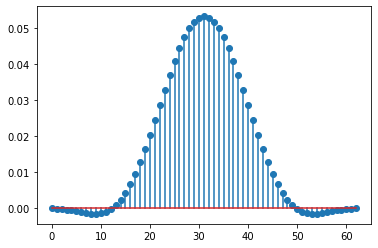

In [55]:
plt.stem(b.T)
print(fir_lp.getWindow())
b.size

In [56]:
sig_raw = sig_raw.reshape(sig_raw.size)
b = b.reshape(b.size)

y = np.convolve(sig_raw, b)


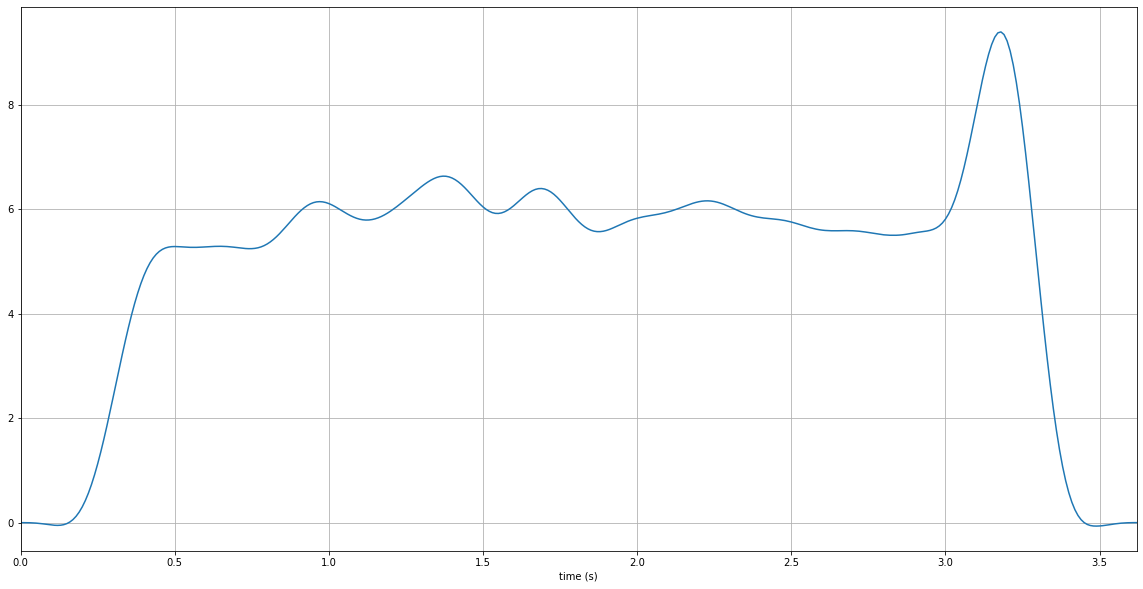

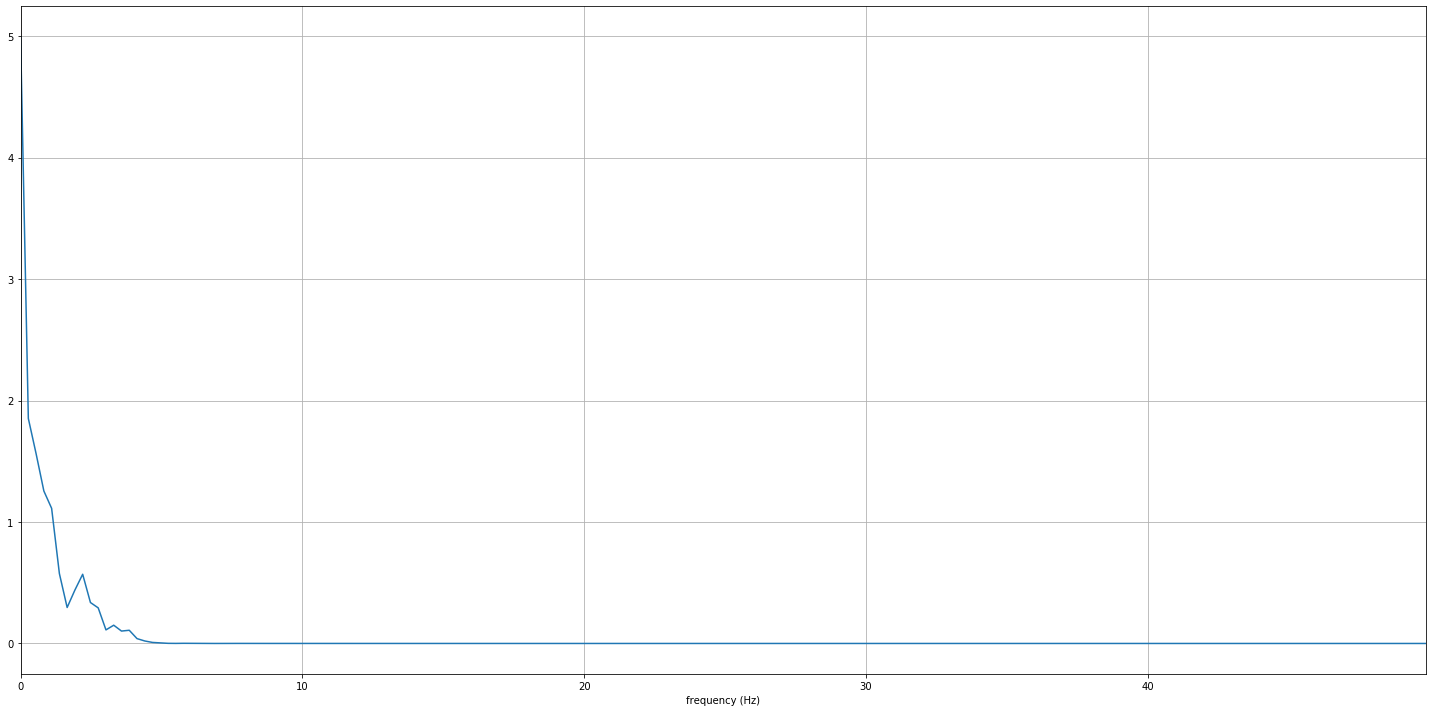

array([ 1.81322614e+03+0.00000000e+00j, -3.33114320e+02+4.54281062e+01j,
       -2.64057874e+02+1.03280829e+02j, -2.22190008e+02+5.02361729e+01j,
       -2.01902654e+02-2.37846766e+00j, -8.75394665e+01-5.69508409e+01j,
       -5.06425404e+00-5.35204853e+01j,  6.92253942e+01-3.97677856e+01j,
        1.03401924e+02-5.87733817e-01j,  6.07316825e+01+7.34477115e+00j,
        2.32575629e+01+4.78338176e+01j,  6.06301696e+00+1.93513339e+01j,
       -2.65874825e+01+6.10530988e+00j, -1.63314089e+01-8.74371484e+00j,
       -1.81330139e+01-7.76230582e+00j,  1.47236208e+00-7.09900708e+00j,
        2.34201563e+00-2.87521938e+00j,  1.17859284e+00+9.72672609e-01j,
        5.35759684e-01+6.41100386e-01j,  6.84703461e-02+1.83967144e-01j,
        8.73973029e-02+3.67907675e-02j,  1.87366670e-01-1.49346411e-01j,
        6.62455296e-02+1.26308486e-01j, -3.06535970e-02+1.71076348e-01j,
       -3.33783784e-02+4.80570229e-02j,  5.94948046e-03-9.13035802e-03j,
        5.58517031e-02+4.65257683e-02j, -4.18016817

In [57]:
compute_and_plot_fft(y, Fs)

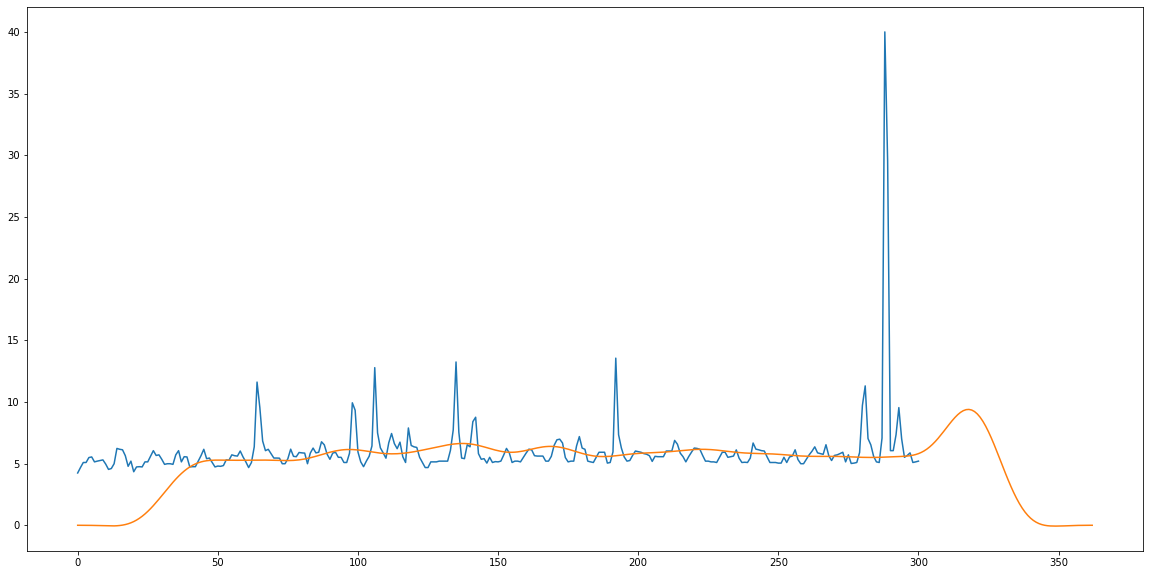

In [58]:
plt.figure(1, figsize=(20,10))
plt.plot(sig_raw)
plt.plot(y)

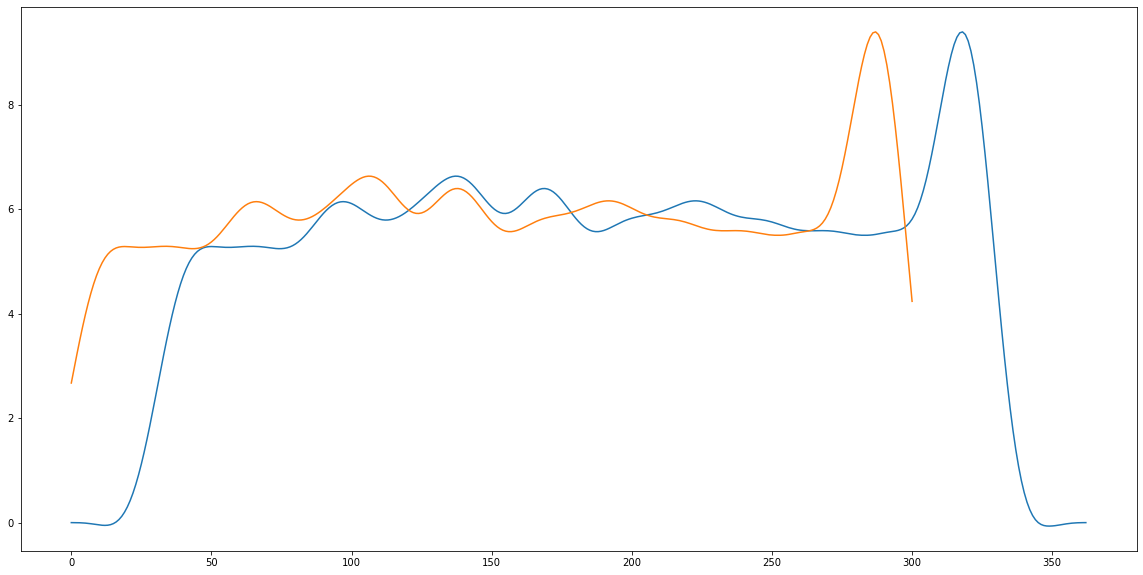

In [59]:
y1 = y[int(b.size/2):-int(b.size/2)]
plt.figure(1, figsize=(20,10))
plt.plot(y)
plt.plot(y1)

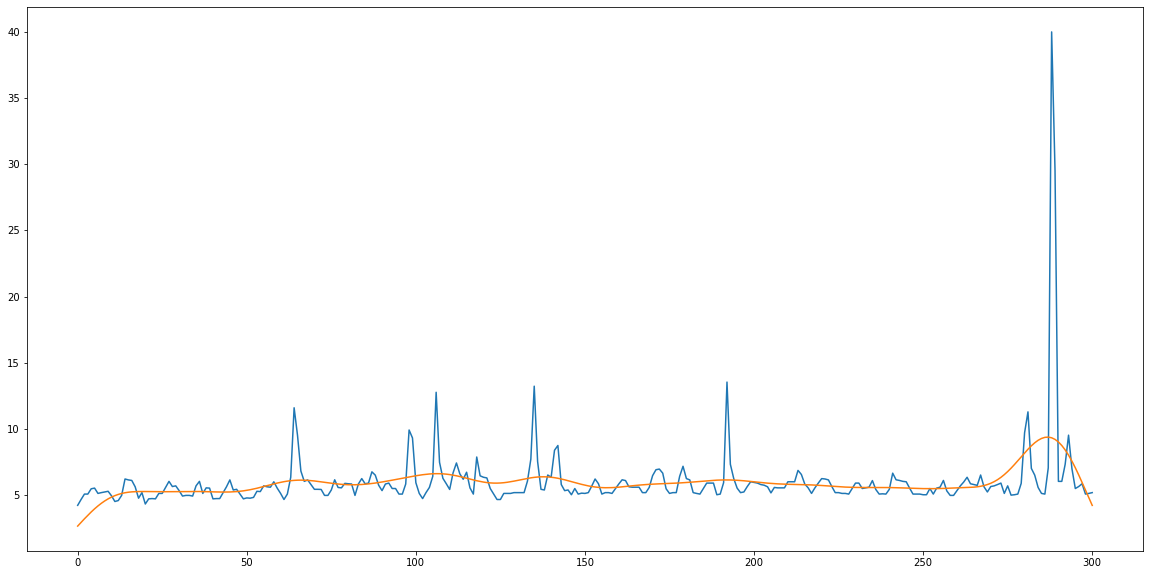

In [60]:
plt.figure(1, figsize=(20,10))
plt.plot(sig_raw)
plt.plot(y1)

In [61]:
from os.path import isfile
from os import remove

if isfile("filter_coeffs.txt"):
  remove("filter_coeffs.txt")

with open("filter_coeffs.txt", "a") as file:
  for coeff in b:
    file.write(str(coeff)+'\n')
  file.close()



In [63]:
Fs

100.0